In [ ]:
import folium
from folium import plugins

# 读取GeoJSON数据
geojson_data = 'testdata.geojson'

# 定义颜色区间和图例标签
colors = ['green', 'yellow', 'orange', 'red']
legend_labels = ['Low', 'Moderate', 'High', 'Very High']

# 创建地图对象
m = folium.Map(location=[37, 113], zoom_start=10)

# 创建Choropleth图层，将面数据着色
folium.Choropleth(
    geo_data=geojson_data,
    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=1,
    key_on='feature.properties.vegetable',
    data=None,
    legend_name='Vegetation',
    bins=[0, 25, 50, 75, 400],  # 根据数据分成的区间
    colors=colors,
).add_to(m)

# 添加图例
folium.LayerControl(collapsed=False).add_to(m)

# 添加指北针
minimap = plugins.MiniMap()
m.add_child(minimap)

# 添加比例尺
# folium.plugins.ScaleControl().add_to(m)
# 显示地图
m

In [31]:
import pandas
import requests

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pandas.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[48, -102], 
               zoom_start=3, 
               tiles='Stamen Terrain',
               zoom_control=False,
               control_scale=True)
# blank_tile_layer = folium.TileLayer(tiles='', attr='')

# 将空白底图图层添加到地图上
# blank_tile_layer.add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    bins=[0, 3, 6, 9, 12]
).add_to(m)

# folium.LayerControl().add_to(m)
m

NameError: name 'folium' is not defined

<Axes: >

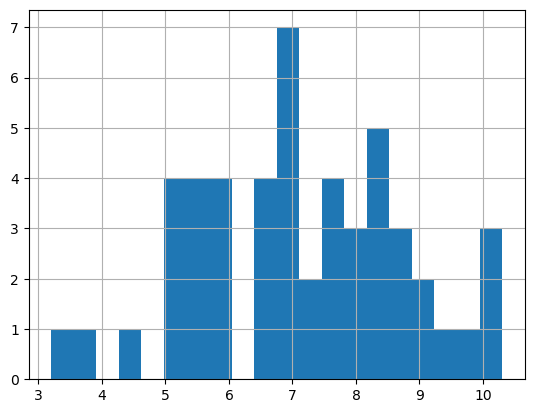

In [ ]:
state_data["Unemployment"].hist(bins=20)


In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
world = geopandas.read_file('testdata.geojson')
# ei = mapclassify.EqualInterval(world['vegetable'], k=5)
ei = mapclassify.HeadTailBreaks(world['vegetable'], k=5)
world['category'] = ei.yb
ax = world.plot(column='category', 
                legend=True, 
                # legend_kwds={'loc': 'lower right'}, 
                cmap='OrRd', 
                figsize=(10.5, 10))
ax.add_artist(ScaleBar(3, units="km", location="lower left"))
ax.set_xticks([], None)
ax.set_yticks([], None)
plt.title("METHOD")
ax.set_axis_off()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'k'

In [24]:
world.head()

,ID,NAME,CODE,fruit,vegetable,corn,oil,herb,total_food,均值,...,NTDS_rate,GDP,doctor,fertilizer,soil,elevation,river,road,birth,geometry
0,1,松沟,02010,0.0,9.0,124.0,13.03,443.0,140.3905,95.1716,...,0.0000,3.7003,1.0,20.0,20,1400.00,6,6,14,"MULTIPOLYGON (((113.73731 37.09375, 113.74315 ..."
1,2,夫子岭,03022,0.0,20.0,161.0,2.74,155.0,500.3170,95.1716,...,0.0000,5.8980,1.0,46.0,20,1300.00,4,4,31,"MULTIPOLYGON (((113.75898 37.09599, 113.75844 ..."
2,3,大发沟,08039,0.0,7.0,130.0,1.54,283.0,147.8025,95.1716,...,0.0000,4.0223,1.0,37.0,20,1300.00,2,4,24,"MULTIPOLYGON (((113.76248 37.11284, 113.76247 ..."
3,4,后营,07006,0.0,5.0,42.0,0.83,119.0,59.4050,95.1716,...,0.1304,3.4298,1.0,80.0,20,1276.92,4,4,23,"MULTIPOLYGON (((113.74071 37.11888, 113.74364 ..."
4,5,前营,03051,0.0,21.0,26.0,12.54,170.0,43.1030,95.1716,...,0.0000,2.2581,1.0,23.0,20,1222.04,4,6,33,"MULTIPOLYGON (((113.73260 37.12031, 113.72406 ..."


<Axes: >

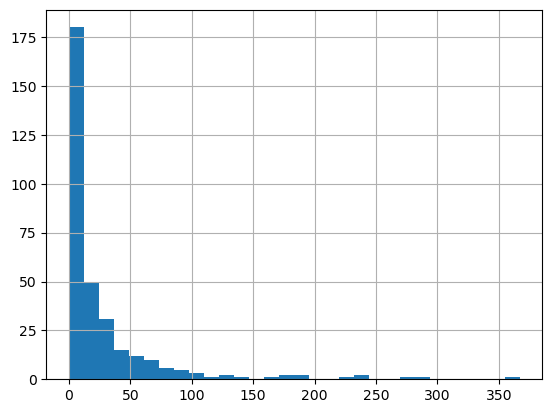

In [14]:
world.vegetable.hist(bins=30)

‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

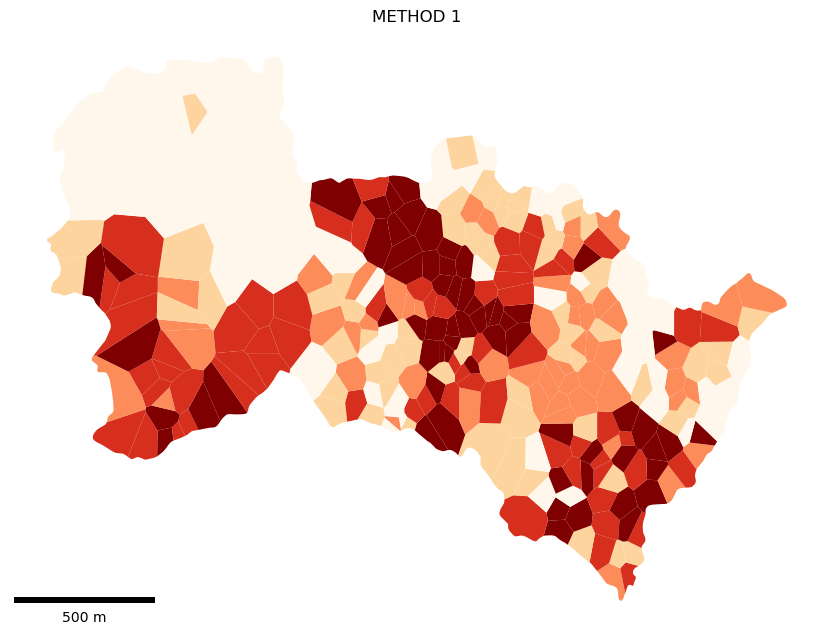

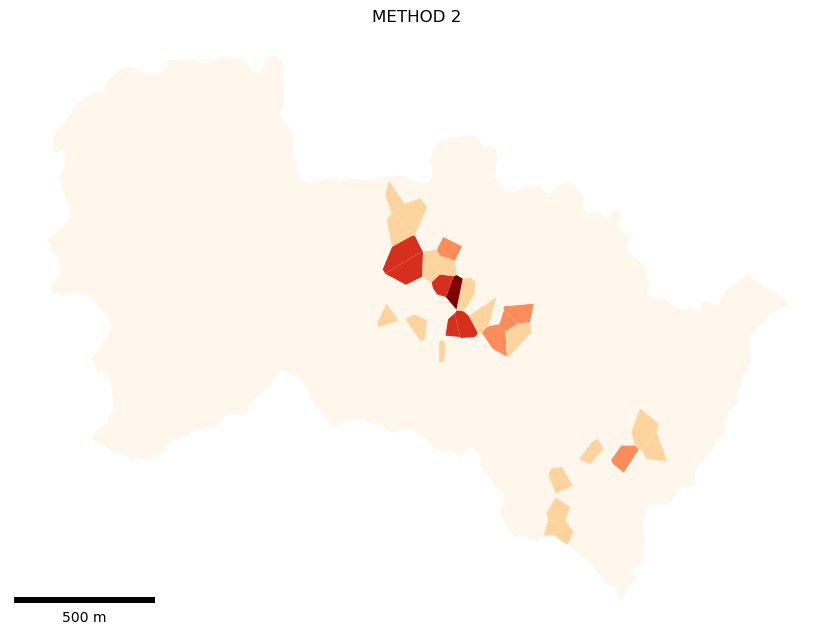

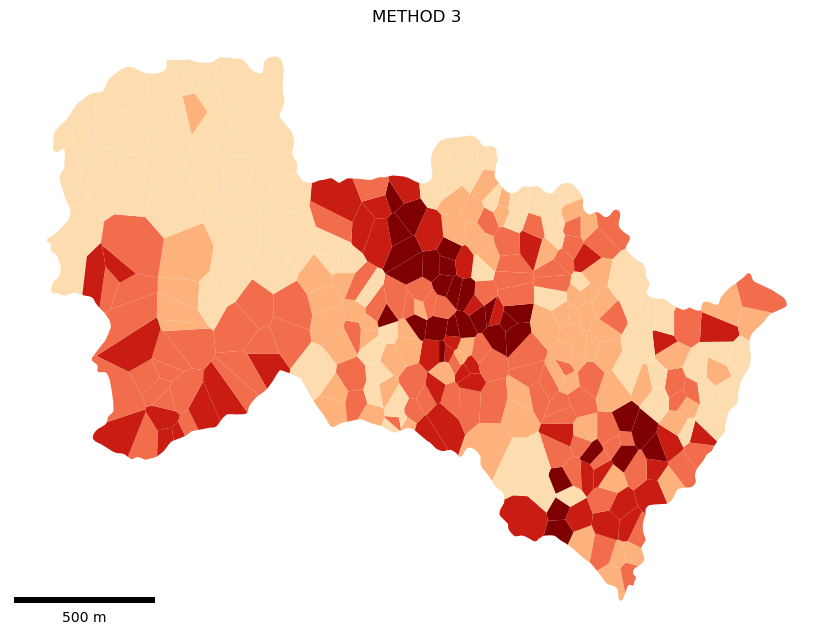

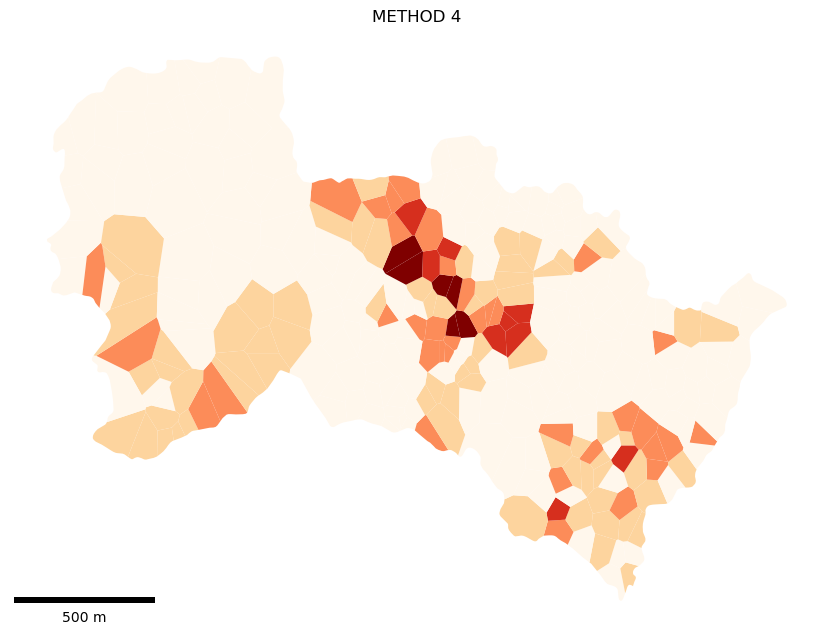

In [38]:
world = geopandas.read_file('testdata.geojson')
classifyMethods = ["quantiles","equal_interval", "box_plot", "natural_breaks"]
def plotMap(df, col, sche, index):
    ax = df.plot(column= col, 
                    legend=False, 
                    legend_kwds={'loc': 'lower right'}, 
                    cmap='OrRd', 
                    scheme=sche,
                    figsize=(10.5, 10))
    ax.add_artist(ScaleBar(3, units="km", location="lower left"))
    ax.set_xticks([], None)
    ax.set_yticks([], None)
    plt.title("METHOD {}".format(i + 1))
    ax.set_axis_off()
    plt.show()

for i, s in enumerate(classifyMethods):
    plotMap(world, "vegetable", s, i)

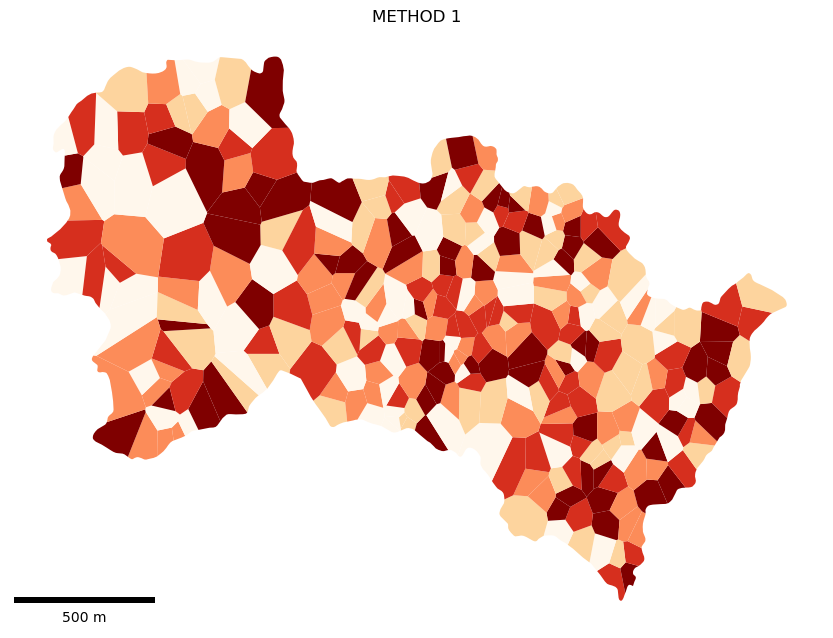

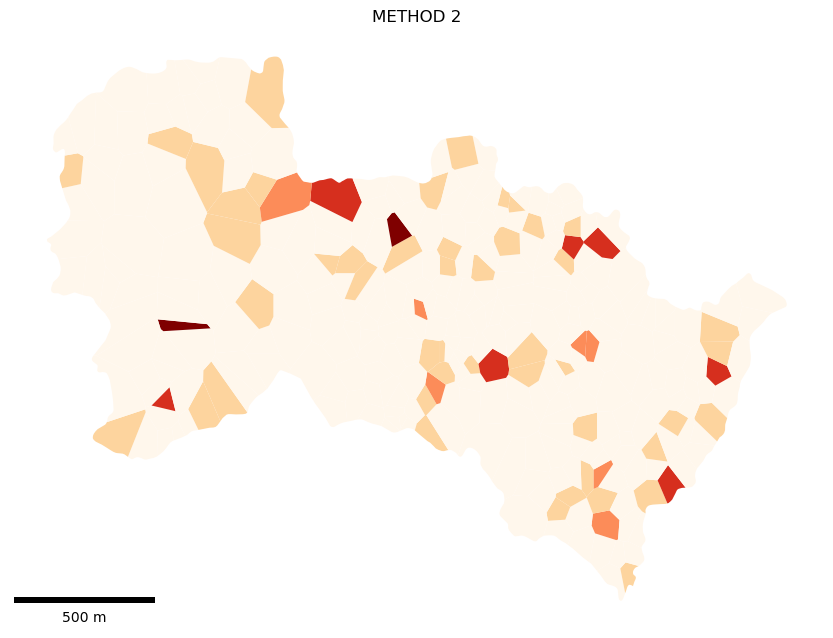

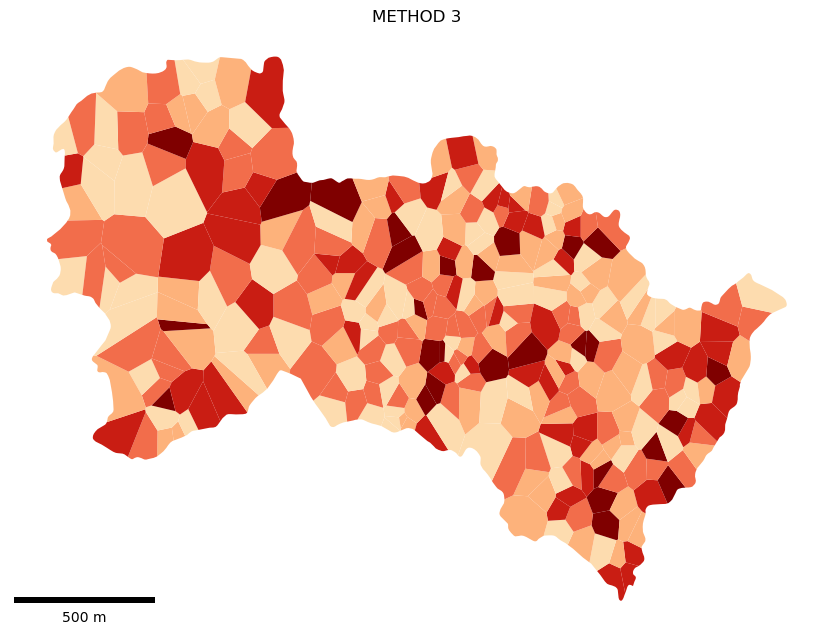

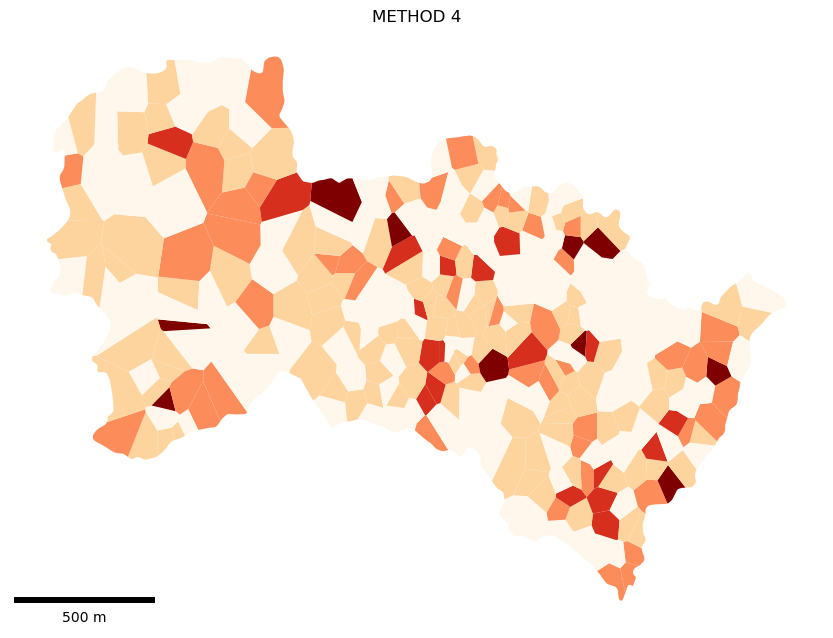

In [37]:
for i, s in enumerate(classifyMethods):
    plotMap(world, "corn", s, i)